<h1> Datathon de henry!, para esta primera parte arrancando el datathon, voy a importar las librerias necesarias <h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

<h2> Leemos el dataset E-Commerce_train.xlsx y vemos si tiene algun dato nulo o faltante <h2>

In [2]:
train = pd.read_excel("E-Commerce_train.xlsx")
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


<h2> Hacemos lo mismo con E-Commerce_test.xlsx <h2>

In [3]:
test = pd.read_excel("E-Commerce_test.xlsx")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2000 non-null   int64 
 1   Warehouse_block      2000 non-null   object
 2   Mode_of_Shipment     2000 non-null   object
 3   Customer_care_calls  2000 non-null   int64 
 4   Customer_rating      2000 non-null   int64 
 5   Cost_of_the_Product  2000 non-null   int64 
 6   Prior_purchases      2000 non-null   int64 
 7   Product_importance   2000 non-null   object
 8   Gender               2000 non-null   object
 9   Discount_offered     2000 non-null   int64 
 10  Weight_in_gms        2000 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 172.0+ KB


<h2> Ahora que sabemos que no hay ni valores nulos, Procedo a binarizar las variables cualitativas para poder hacer un pairplot <h2>

In [4]:
importance = {'low':1,'medium':2,'high':3}
gender = {'F':1,'M':2}
warehouse = {'A':1,'B':2,'C':3,'D':4,'F':5}
shipment = {'Road':1,'Flight':2,'Ship':3}
dataTrain = train.replace({'Product_importance':importance,'Gender':gender,'Warehouse_block':warehouse,'Mode_of_Shipment':shipment})
dataTest = test.replace({'Product_importance':importance,'Gender':gender,'Warehouse_block':warehouse,'Mode_of_Shipment':shipment})


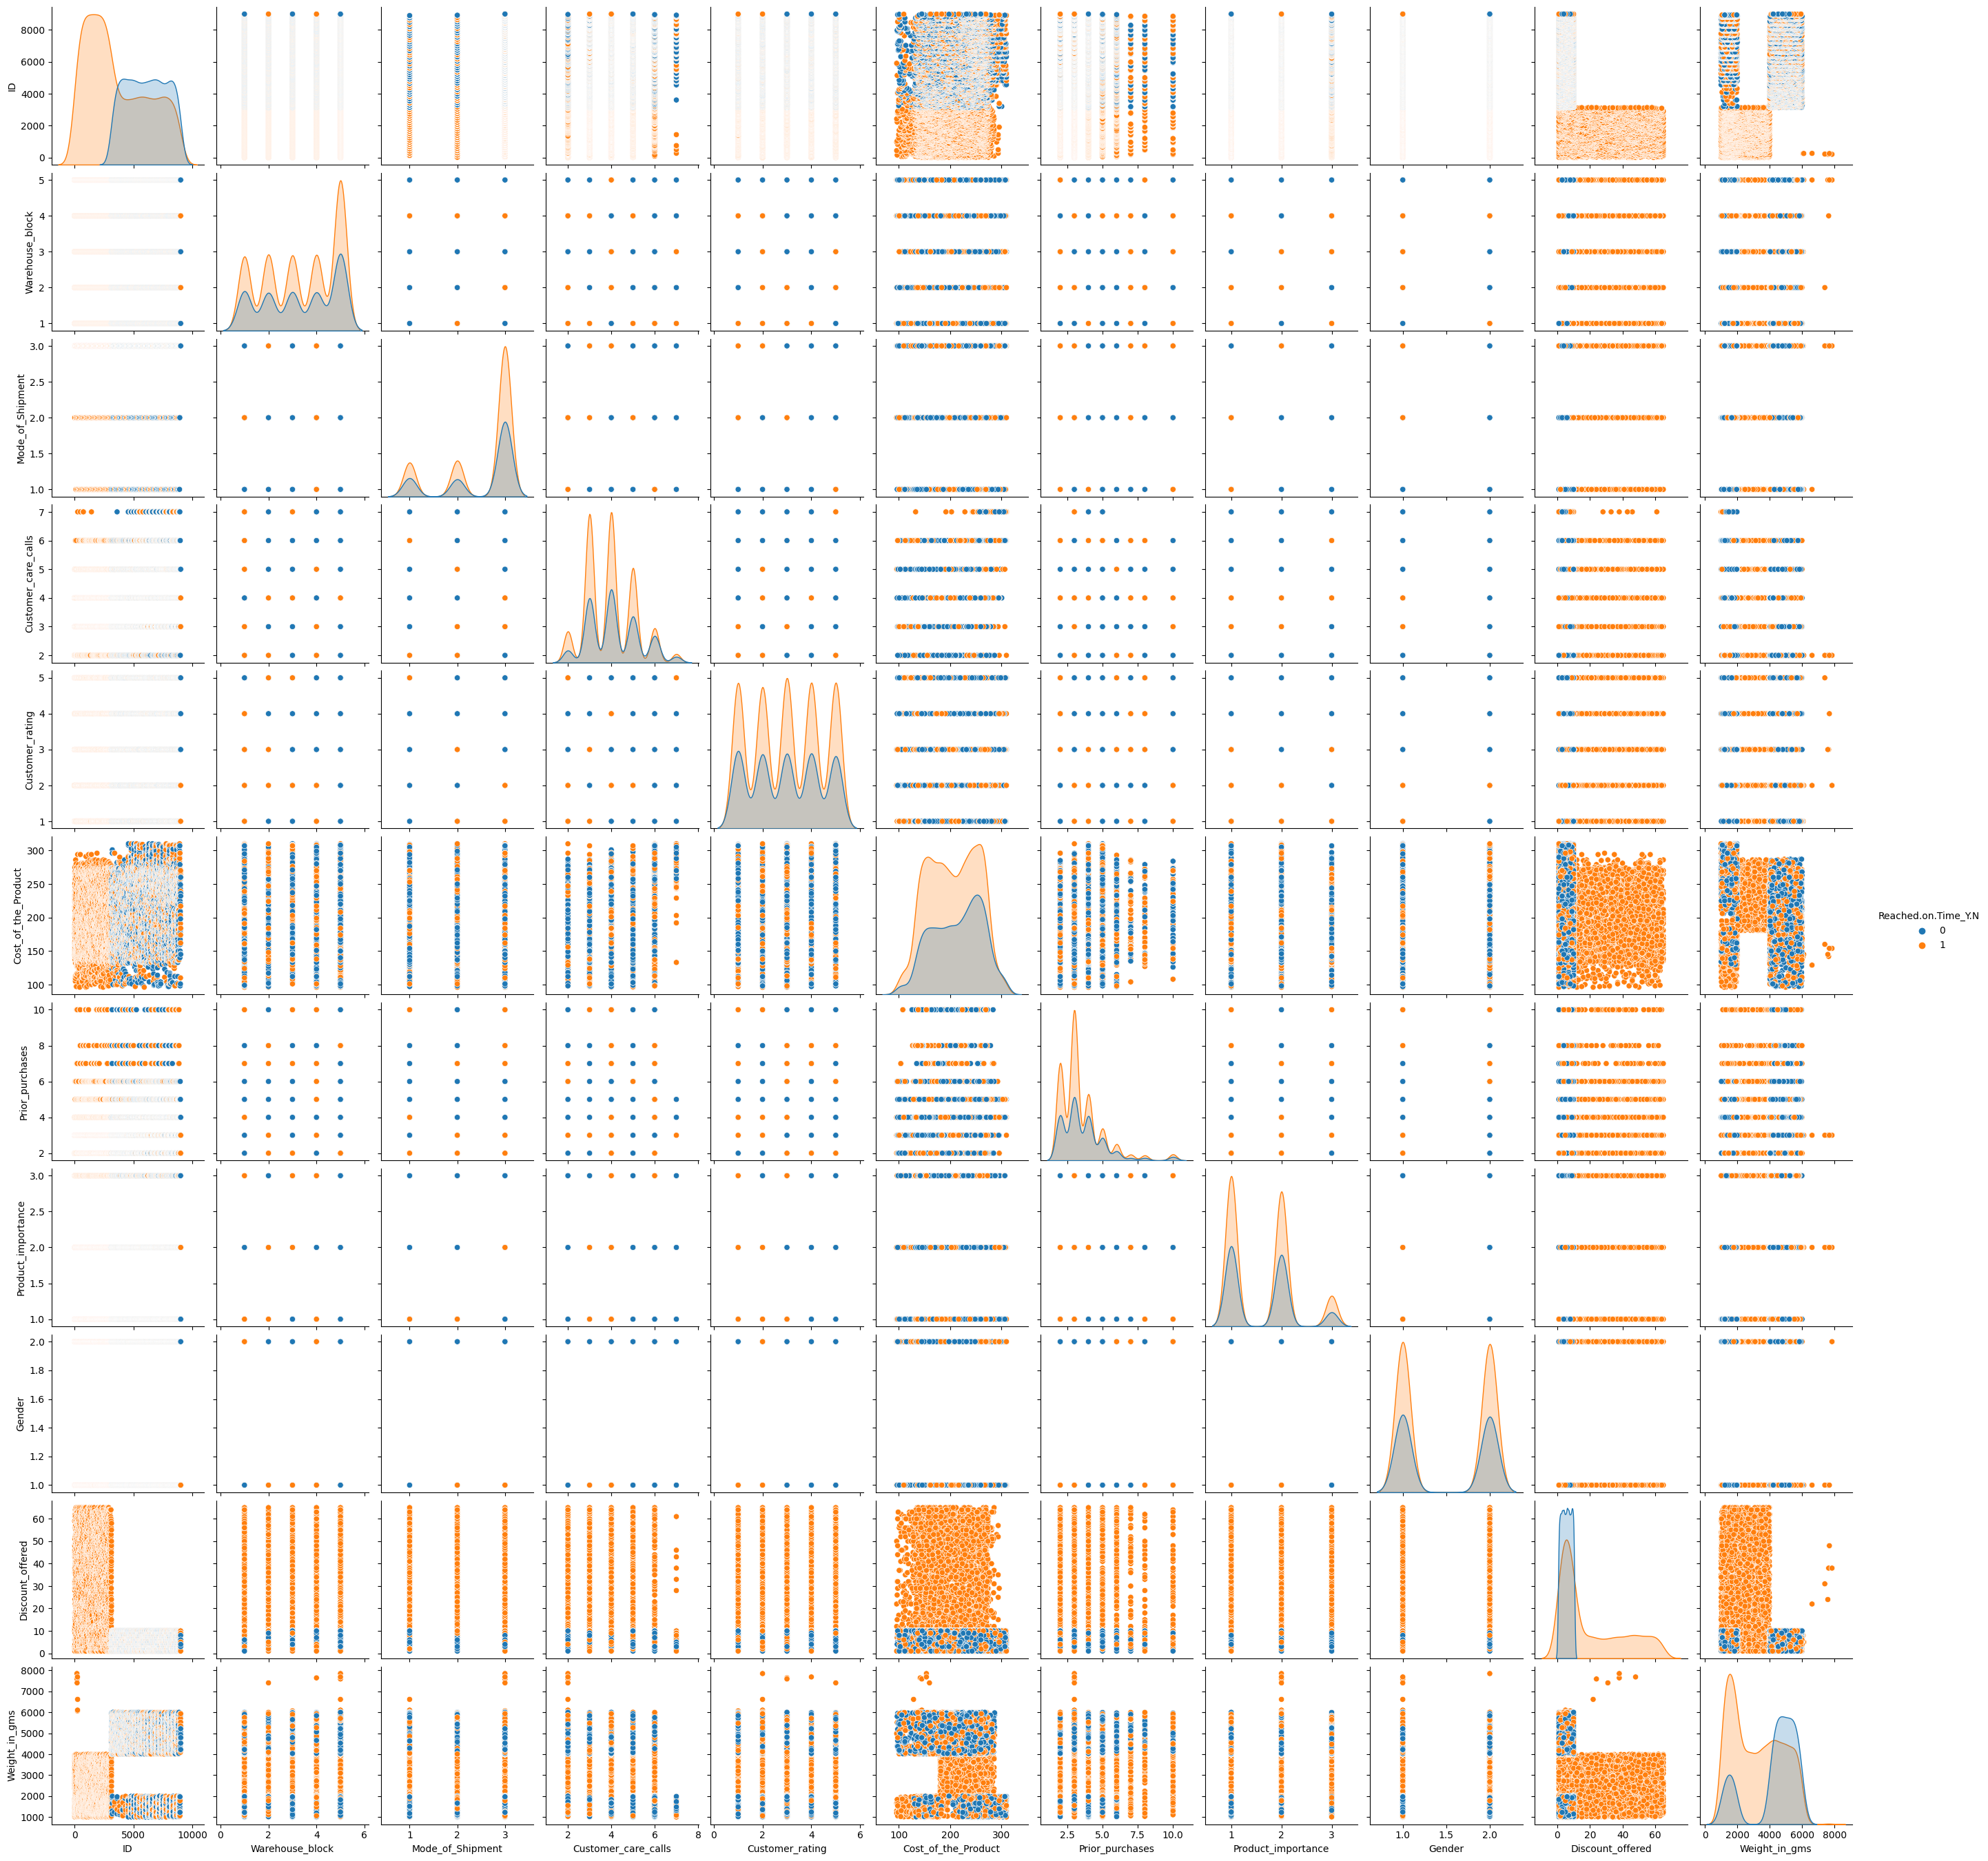

In [5]:
sns.pairplot(dataTrain,hue="Reached.on.Time_Y.N")
plt.show()

<h2> Con el pairplot puedo observar que cuando "Discount_offered" es mayor alrededor del 10% el envio siempre llega a tiempo, tambien es interesante ver cuando el "Weight_in_gms" esta entre , aproximadamente 2000 y 4000 tambien llega a tiempo<h2>

In [6]:
dataTrain = dataTrain.loc[dataTrain["Weight_in_gms"] >= 2000]
dataTrain = dataTrain.loc[dataTrain['Weight_in_gms'] <= 4000]
contador = 0
rows = dataTrain.shape[0]
contador = 0
for i in range(rows):
       if dataTrain["Reached.on.Time_Y.N"].iloc[i] == 0:
              contador+=1
contador

3

<h2> Haciendo un mayor analisis puedo observar que, aquellos envios en el que "Weight_in_gms" esta entre 2000 y 4000 solo 3 no llegaron a tiempo, ahora procederemos con "Discount_offered" mayor a 10% , Haremos una nueva lectura de los datasets sacando solo el descuento mayor a 10, luego volveremos a "Weight_in_gms"<h2>

In [8]:
test = pd.read_excel("E-Commerce_test.xlsx")
train = pd.read_excel("E-Commerce_train.xlsx")

importance = {'low':1,'medium':2,'high':3}
gender = {'F':1,'M':2}
warehouse = {'A':1,'B':2,'C':3,'D':4,'F':5}
shipment = {'Road':1,'Flight':2,'Ship':3}
dataTrain = train.replace({'Product_importance':importance,'Gender':gender,'Warehouse_block':warehouse,'Mode_of_Shipment':shipment})
dataTest = test.replace({'Product_importance':importance,'Gender':gender,'Warehouse_block':warehouse,'Mode_of_Shipment':shipment})


<h2> Analizamos "Discount_offered" ... <h2>

In [9]:
dataTrain = train.loc[train['Discount_offered'] > 10]
rows = dataTrain.shape[0]

contador = 0
for i in range(rows):
       if dataTrain["Reached.on.Time_Y.N"].iloc[i] == 0:
              contador+=1
contador


0

In [10]:
dataTrain = train.loc[train["Discount_offered"] >= 10]
rows = dataTrain.shape[0]
contador = 0
for i in range(rows):
       if dataTrain["Reached.on.Time_Y.N"].iloc[i] == 0:
              contador+=1
contador

341

<h3> Gracias al analisis sabemos que aquellos envios en que el valor de "Weight_in_gms" esta entre 2000 y 4000 solo 3 no llegaron a tiempo, y cuando "Discount_offered" es mayor o igual a 10, solo 341 no llegaron a tiempo y si es mayor a 10, no existe los que no llegaron a tiempo, procedemos a quitar valores y columnas irrelevantes... <h3>

In [60]:
test = pd.read_excel("E-Commerce_test.xlsx")
train = pd.read_excel("E-Commerce_train.xlsx")

importance = {'low':1,'medium':2,'high':3}
gender = {'F':1,'M':2}
warehouse = {'A':1,'B':2,'C':3,'D':4,'F':5}
shipment = {'Road':1,'Flight':2,'Ship':3}
dataTrain = train.replace({'Product_importance':importance,'Gender':gender,'Warehouse_block':warehouse,'Mode_of_Shipment':shipment})
dataTest = test.replace({'Product_importance':importance,'Gender':gender,'Warehouse_block':warehouse,'Mode_of_Shipment':shipment})

dataTrain_aux = dataTrain[dataTrain["Weight_in_gms"] >= 4000]
dataTrain_aux2 = dataTrain[dataTrain["Weight_in_gms"] <= 2000]
frames = [dataTrain_aux,dataTrain_aux2]
dataTrain = pd.concat(frames)

dataTrain = dataTrain.loc[dataTrain['Discount_offered'] <= 10]
dataTrain = dataTrain.drop(columns = ["Gender"])

<h2> Definimos features (X) y etiquetdas (Y) <h2>

In [61]:
x = dataTrain.drop(columns =["Reached.on.Time_Y.N"]).values
y = dataTrain["Reached.on.Time_Y.N"].values

<h2> Voy a separar los datos en datos de entrenamiento y testeo, voy a usar 25% del dataset para evaluar <h2>

In [62]:
x.reshape(-1,1)
y.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=7)

<h1> Procederemos a instanciar el modelo <h1>

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)

In [64]:
#Entrenamos

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
#Predecimos sobre el set de entrenamiento
y_train_pred = knn.predict(x_train)

#Predecimos sobre nuestro set de testeo

y_test_pred = knn.predict(x_test)

<h2> Procedemos a crear la matriz de confusion <h2>

In [66]:
m = confusion_matrix(y_train, y_train_pred)

In [67]:
m_display = ConfusionMatrixDisplay(m)


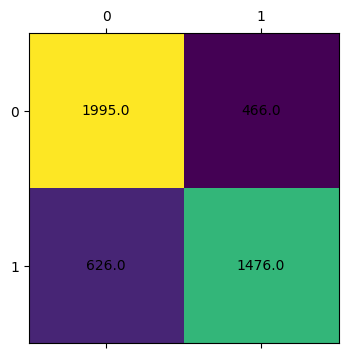

In [68]:
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(m)
for (i, j), z in np.ndenumerate(m):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [69]:
print(f'Recall score en test: {round(recall_score(y_test, y_test_pred),4)}')

Recall score en test: 0.5028


<h1> Para finalizar <h1>

In [70]:
importance = {'low':1,'medium':2,'high':3}
gender = {'F':1,'M':2}
warehouse = {'A':1,'B':2,'C':3,'D':4,'F':5}
shipment = {'Road':1,'Flight':2,'Ship':3}
testing = dataTest.drop(columns='Gender')
final = knn.predict(testing)
res = pd.DataFrame(final,columns=['pred'])
res.to_csv('NicoLorDev97.csv',index=False)

C:\Users\UsuarioNico\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
